# Dynamic Process: Base Case (6.2.1, 6.2.4, 6.3, C.2, C.3, C.7)

In [1]:
from matplotlib import pyplot as plt
from poisson_approval import *

In [2]:
N_SAMPLES = 10000
N_MAX_EPISODES = 1000

In [3]:
rand_profile = RandProfileHistogramUniform(n_bins=1)

In [4]:
results = monte_carlo_fictitious_play(
    factory=rand_profile,
    n_samples=N_SAMPLES,
    n_max_episodes=N_MAX_EPISODES,
    voting_rules=VOTING_RULES,
    init='random_tau',
    monte_carlo_settings=[
        MCS_CONVERGES,
        MCS_WELFARE_LOSSES,
        MCS_UTILITY_THRESHOLDS,
        MCS_BALLOT_STATISTICS,
        MCS_DECREASING_SCORES
    ],
    file_save='sav/base_case.sav',
)

## Convergence (6.2.1)

In [5]:
results[APPROVAL]['mean_converges']

0.952

In [6]:
results[PLURALITY]['mean_converges']

1.0

In [7]:
results[ANTI_PLURALITY]['mean_converges']

0.0

## Welfare Losses (6.2.4, C.2, C.3)

In [8]:
results[APPROVAL]['mean_utilitarian_welfare_loss']

0.006778897505995395

In [9]:
results[PLURALITY]['mean_utilitarian_welfare_loss']

0.060140989673448934

In [10]:
results[ANTI_PLURALITY]['mean_utilitarian_welfare_loss']

0.09870457398113966

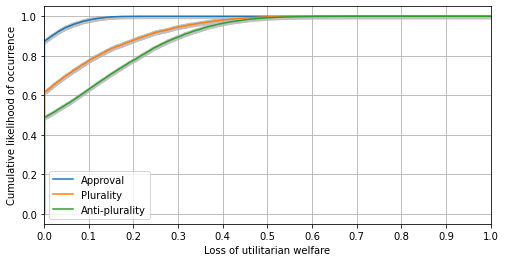

In [11]:
plot_welfare_losses(results, 'utilitarian_welfare_losses')
plt.savefig('img/fUWelfare.png', dpi=600, bbox_inches="tight")

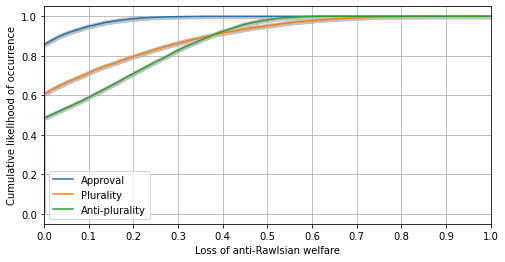

In [12]:
plot_welfare_losses(results, 'plurality_welfare_losses')
plt.savefig('img/fPLWelfare.png', dpi=600, bbox_inches="tight")

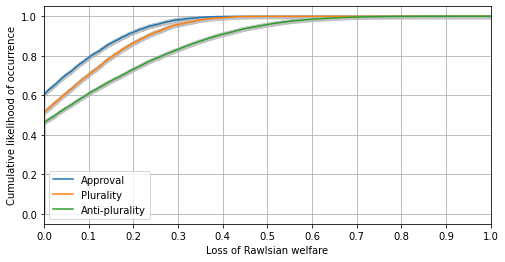

In [13]:
plot_welfare_losses(results, 'anti_plurality_welfare_losses')
plt.savefig('img/fAPLWelfare.png', dpi=600, bbox_inches="tight")

## Utility Thresholds (6.3, C.7)

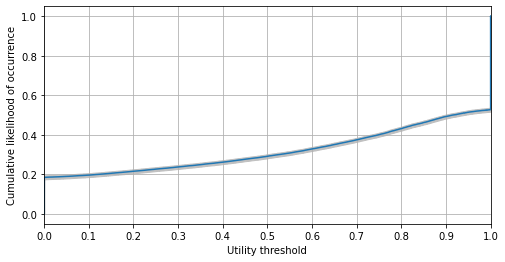

In [14]:
plot_utility_thresholds(results, APPROVAL)
plt.savefig('img/fThresholds.png', dpi=600, bbox_inches="tight")

In [15]:
results[APPROVAL]['p_utility_threshold_0']

0.1847010518611007

In [16]:
results[APPROVAL]['p_utility_threshold_1']

0.4722538949283068

In [17]:
results[APPROVAL]['p_utility_threshold_not_0_or_1']

0.3430450532105924

## Ballot Statistics (6.3)

In [18]:
results[APPROVAL]['mean_share_single_votes']

0.6814864927666361

In [19]:
results[APPROVAL]['mean_share_double_votes']

0.3185135072333639

## Scores of the Candidates (6.3)

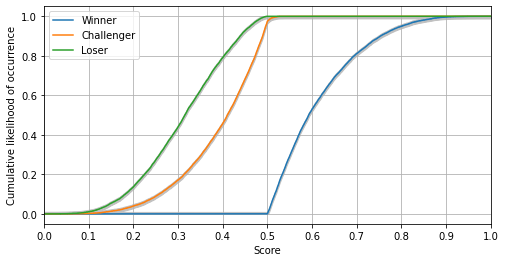

In [20]:
plot_distribution_scores(results, APPROVAL)
plt.savefig('img/fScores.png', dpi=600, bbox_inches="tight")

A counter-example where the challenger may have more than 50% of approval:

In [21]:
profile = ProfileHistogram({('abc', (1., )): .33, ('acb', (1., )): .01,
                            ('bac', (1., )): .08, ('bca', (1., )): .08,
                            ('cab', (1., )): .02, ('cba', (1., )): .48})
profile

<abc: 0.33 [1.], acb: 0.01 [1.], bac: 0.08 [1.], bca: 0.08 [1.], cab: 0.02 [1.], cba: 0.48 [1.]> (Condorcet winner: c)

Let us try some random taus at initialization, until one gives the desired counter-example behavior:

In [22]:
i = 0
while True:
    i += 1
    print()
    print('Tau attempt number %s' % i)
    results = profile.fictitious_play(
        init='random_tau', n_max_episodes=1000, 
        perception_update_ratio=one_over_log_t_plus_one,
        ballot_update_ratio=one_over_log_t_plus_one,
        winning_frequency_update_ratio=one_over_log_t_plus_one
    )
    if results['tau'] is None:
        print('No convergence')
        continue
    scores = results['tau'].scores.values()
    print('Results: %s' % results)
    print('Scores: %s' % results['tau'].scores)
    if len([s for s in scores if s > .5]) > 1:
        break


Tau attempt number 1
Results: {'converges': True, 'tau': TauVector({'a': 0.33, 'ac': 0.03, 'b': 0.16, 'bc': 0.48}), 'strategy': StrategyThreshold({'abc': 1.0, 'acb': 0, 'bac': 1, 'bca': 1, 'cab': 0, 'cba': 0}), 'tau_init': TauVector({'a': 0.08413489495889137, 'ab': 0.47035846921310287, 'ac': 0.031199702607497493, 'b': 0.003972010294148842, 'bc': 0.12120334467892513, 'c': 0.2891315782474343}), 'n_episodes': 41, 'd_candidate_winning_frequency': {'b': Fraction(1, 1)}}
Scores: {a: 0.36, b: 0.64, c: 0.51}
